In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

In [2]:
network_path = "FS_gap_junction_coupling_simulation"
experiment_config_file = "FS_gap_junction_experiment-0.json"

In [3]:
# 80500 neurons per mm3, 1.3% are FS.
n_FS = 100
d_cube = (n_FS/(80500 * 0.013))**(1/3) * 1e-3

from snudda.place import create_cube_mesh
mesh_file = os.path.join(network_path, "mesh", "volume.obj")
create_cube_mesh(mesh_file, [0,0,0], d_cube, "FS network volume")

In [4]:
from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, random_seed=123)

si.define_structure(struct_name="StriatalVolume", struct_mesh=mesh_file, d_min=15e-6, mesh_bin_width=50e-6)

si.add_neurons(name="FS", num_neurons=n_FS, volume_id="StriatalVolume",
               neuron_dir=os.path.join("$SNUDDA_DATA","neurons","striatum","fs"))

cluster_FS_synapses = True
cluster_FS_gap_junctions = False
FS_gGABA = [1.1e-9, 1.5e-9]
FS_gGapJunction = [0.5e-9, 0.1e-9]

if False:
    # For this example we just want gap junctions, just listing GABA here for completness
    si.add_neuron_target(neuron_name="FS",
                         target_name="FS",
                         connection_type="GABA",
                         dist_pruning=None,
                         f1=0.15, soft_max=5, mu2=2, a3=1,
                         conductance=FS_gGABA,
                         cluster_synapses=cluster_FS_synapses,
                         mod_file="tmGabaA",
                         channel_param_dictionary={"tau1": (1.33e-3, 1e3),
                                                   "tau2": (5.7e-3, 1e3)})
    
si.add_neuron_target(neuron_name="FS",
                     target_name="FS",
                     connection_type="GapJunction",
                     dist_pruning=None,
                     f1=0.7, soft_max=8, mu2=2, a3=1.0,
                     conductance=FS_gGapJunction,
                     cluster_synapses=cluster_FS_gap_junctions,
                     channel_param_dictionary=None)

si.write_json()

Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing FS_gap_junction_coupling_simulation/network-config.json


In [5]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 155/512 (83 neurons)
Processing hyper voxel : 219/512 (76 neurons)
Processing hyper voxel : 154/512 (71 neurons)
Processing hyper voxel : 147/512 (62 neurons)
Processing hyper voxel : 211/512 (61 neurons)
Processing hyper voxel : 218/512 (58 neurons)
Processing hyper voxel : 146/512 (56 neurons)
Processing hyper voxel : 210/512 (50 neurons)
Processing hyper voxel : 156/512 (47 neurons)
Processing hyper voxel : 163/512 (46 neurons)
Processing hyper voxel : 91/512 (42 neurons)
Processing hyper voxel : 220/512 (39 neurons)
Processing hyper voxel : 227/512 (38 neurons)
Processing hyper voxel : 162/512 (38 neurons)
Processing hyper voxel : 148/512 (32 neurons)
Processing hyper voxel : 90/512 (30 neurons)
Processing hyper voxel : 226/512 (29 neurons)
Processing hyper voxel : 212/512 (28 neurons)
Processing hyper voxel : 283/512 (27 neurons)
Processing hyper voxel : 82/512 (27 neurons)
Processing hyper voxel : 

In [6]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal13_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/caldyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cap_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca

In [7]:
from snudda.simulate.pair_recording import PairRecording

pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)
pr.run()

Loading 100 neurons with 0 synapses and 631 gap junctions
Found 1262 local gap junctions on node.
Running simulation for 1.6 s
Running Neuron simulator 1600 ms, with dt=0.025
1% done. Elapsed: 13.8 s, estimated time left: 1370.3 s
8% done. Elapsed: 122.3 s, estimated time left: 1405.9 s
15% done. Elapsed: 229.9 s, estimated time left: 1302.6 s
22% done. Elapsed: 339.7 s, estimated time left: 1204.5 s
29% done. Elapsed: 456.6 s, estimated time left: 1118.0 s
36% done. Elapsed: 560.4 s, estimated time left: 996.2 s
43% done. Elapsed: 660.9 s, estimated time left: 876.1 s
50% done. Elapsed: 767.6 s, estimated time left: 767.6 s
58% done. Elapsed: 874.3 s, estimated time left: 633.1 s
64% done. Elapsed: 979.9 s, estimated time left: 551.2 s
72% done. Elapsed: 1087.8 s, estimated time left: 423.0 s
79% done. Elapsed: 1190.1 s, estimated time left: 316.3 s
84% done. Elapsed: 1299.9 s, estimated time left: 247.6 s
87% done. Elapsed: 1400.0 s, estimated time left: 209.2 s
95% done. Elapsed: 15

In [8]:
%matplotlib notebook
from snudda.analyse.analyse_gap_junction_coupling import AnalyseGapJunctionCoupling
ac = AnalyseGapJunctionCoupling(network_path=network_path, 
                                experiment_config_file=experiment_config_file)

Loading 100 neurons with 0 synapses and 631 gap junctions
Loading FS_gap_junction_coupling_simulation/simulation/FS-gap-junction-output.hdf5


<IPython.core.display.Javascript object>


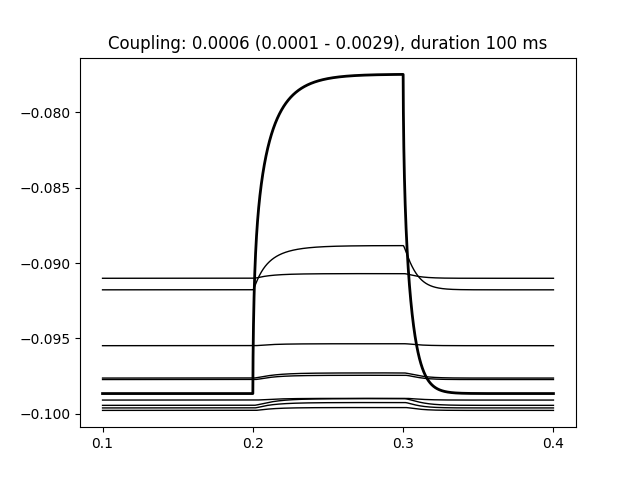

<IPython.core.display.Javascript object>


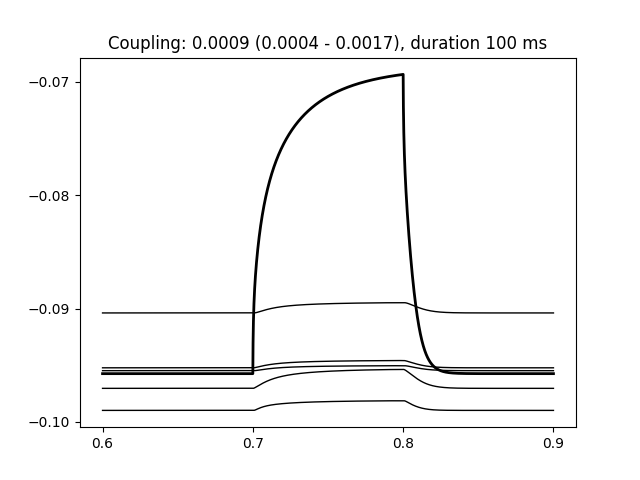

<IPython.core.display.Javascript object>


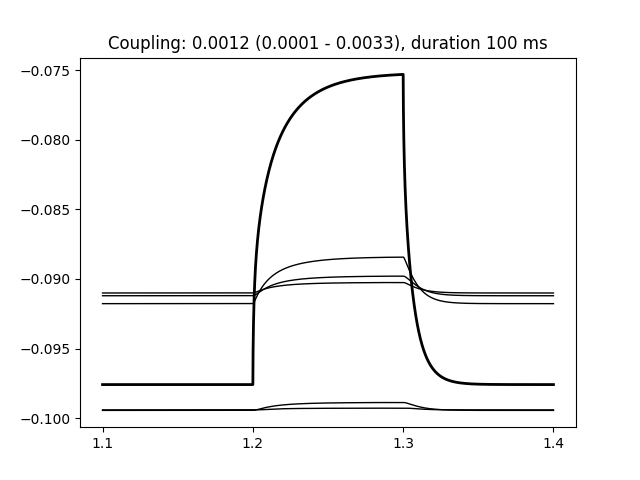

In [9]:
ac.plot_coupling(duration=0.100, amplitude=None)

<IPython.core.display.Javascript object>


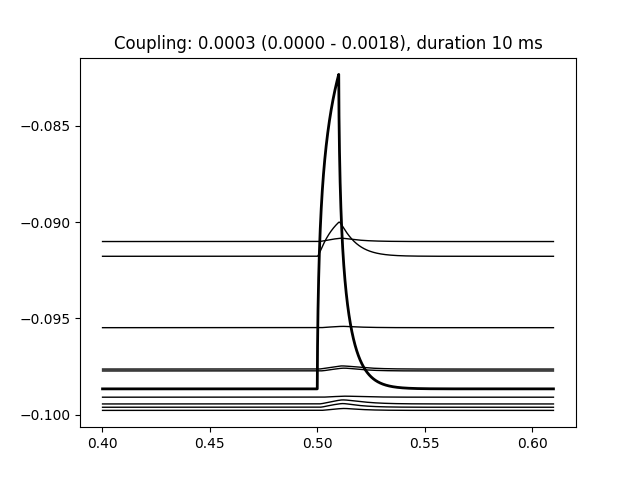

<IPython.core.display.Javascript object>


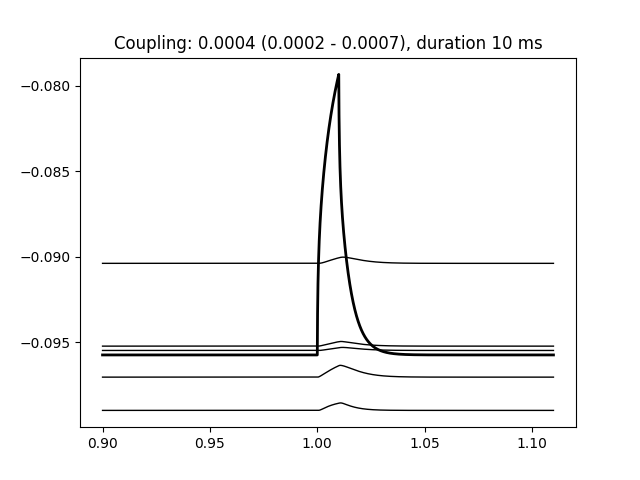

<IPython.core.display.Javascript object>


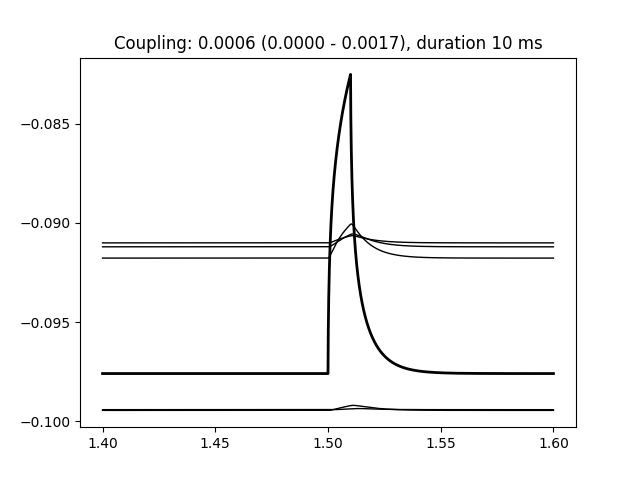

In [10]:
ac.plot_coupling(duration=0.010, amplitude=None)

In [11]:
import os
from snudda.analyse.analyse import SnuddaAnalyse
sa = SnuddaAnalyse(hdf5_file=os.path.join(network_path, "network-synapses.hdf5"))

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Loading 100 neurons with 0 synapses and 631 gap junctions
Number of neurons: 100
Created connection matrix 6.197800030349754e-05 seconds
GJ row : 0 - 0.0 %  time : 0.001071112998033641 seconds
Created gap junction connection matrix 0.0035706999988178723 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 100/100
Calculating synapse distance histogram
Creating dist histogram
Created distance histogram (optimised) in 0.0011900469980901107 seconds
Saving cache to FS_gap_junction_coupling_simulation/network-synapses.hdf5-cache


Plotting connection probability FS to FS (gapjunctions)
Centering in None : Keeping 100/100
Counting connections
Requested: 10000000.0 calculated [9900.]


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1367: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


<IPython.core.display.Javascript object>


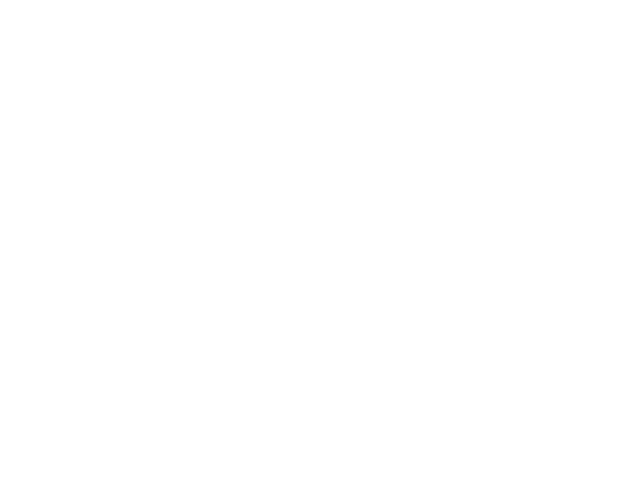

P(d<0.00025) = 0.05109961190168176
P(d<0.00025) = 0.05109961190168176
Wrote FS_gap_junction_coupling_simulation/figures/Network-distance-dependent-connection-probability-FS-to-FS-gapjunctions-3D-dist.pdf


In [12]:
# Koos & Tepper 1999, 2/6
sa.plot_connection_probability("FS", "FS",
                               dist_3d=True,
                               connection_type="gapjunctions",
                               exp_max_dist=[250e-6, 250e-6],
                               exp_data=[2 / 6.0, 3 / 7.0],
                               exp_data_detailed=[(2, 6), (3, 7)], )

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 100/100
Calculating max synapses
Calculating mean synapses
Plotting 175 connections


<IPython.core.display.Javascript object>


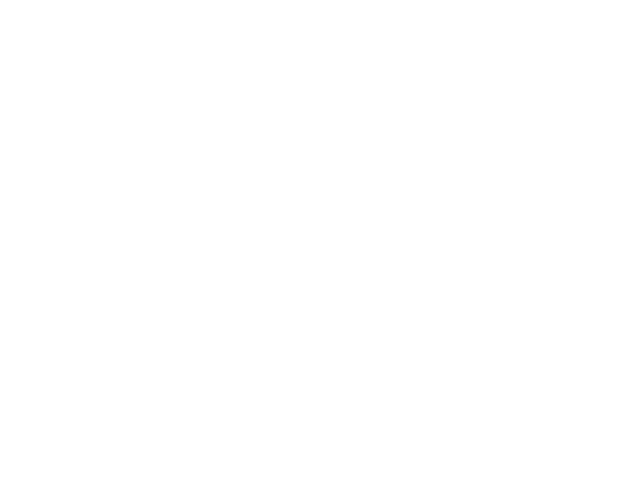

Wrote FS_gap_junction_coupling_simulation/figures/Network-number-of-gapjunctions-from-FS-to-FS-per-cell.pdf


In [13]:
sa.plot_num_synapses_per_pair("FS", "FS", connection_type="gapjunctions")

Calculating number of incoming connections FS -> FS
Centering in None : Keeping 9/100
#pre = 100, #post = 9


<IPython.core.display.Javascript object>


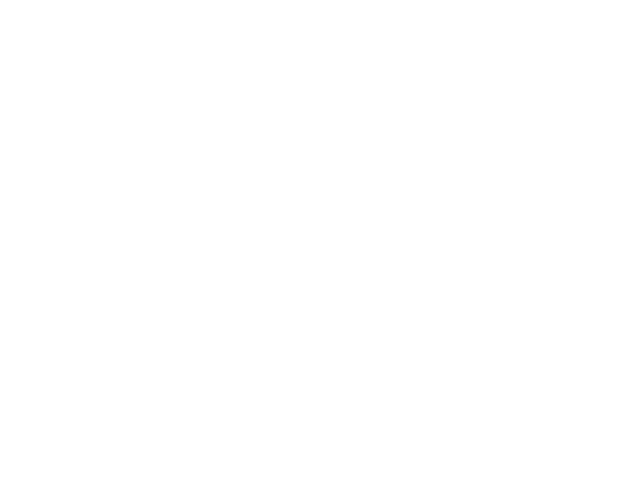

Wrote FS_gap_junction_coupling_simulation/figures/Network-gapjunctions-input-to-FS-from-FS.pdf


<IPython.core.display.Javascript object>


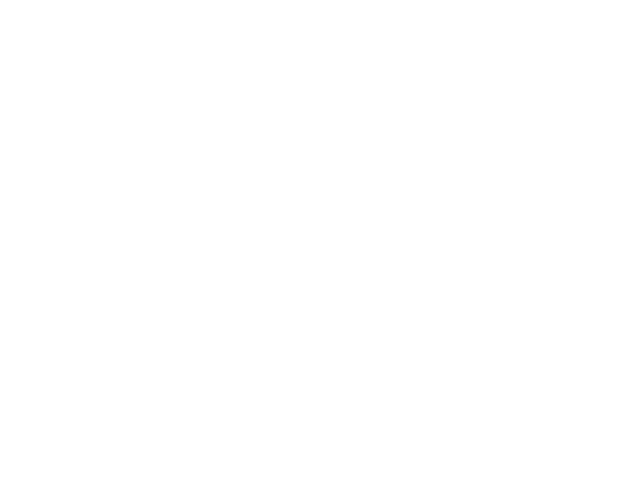

Wrote FS_gap_junction_coupling_simulation/figures/Network-gapjunctions-to-FS-from-FS.pdf


<IPython.core.display.Javascript object>


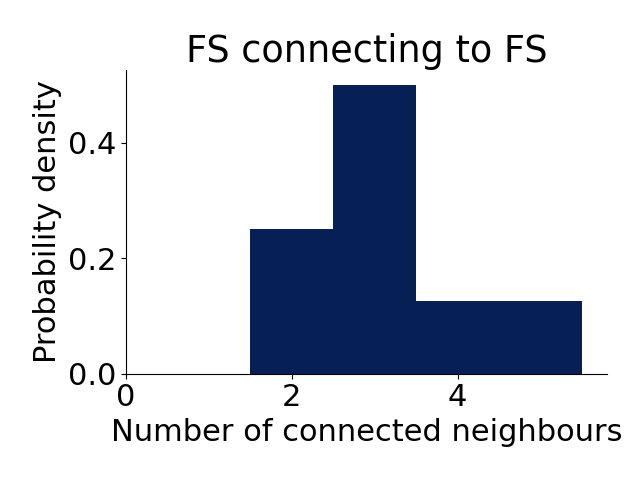

In [14]:
sa.plot_incoming_connections(neuron_type="FS", pre_type="FS", connection_type="gapjunctions")